In [1]:
from OLS import OLS
from Ridge import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from functions import Polynomial_Features
from runge_function import Runge_func
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from plotting import set_plot_params

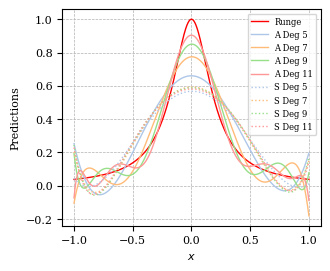

In [4]:
"""
Generates and saves the MSE for each polynomial degree between degree_min and degree_max.
"""

FOLDER = "../figs/"
SAVE_NAME = "analytic_simple_OLS_fits.pdf"

np.random.seed(2025)

n=1000

degree_min = 2
degree_max = 15

degrees = range(degree_min, degree_max+1, 5)

degrees = [5, 7 ,9, 11]

learning_rate = 0.001
max_its = 10000

set_plot_params(1,1)
colors = mpl.color_sequences["tab20"]

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, degree_max)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

y_mean = y_train.mean()
y_tr_centered = y_train - y_mean

plt.plot(x, y_true, color = "red", label = "Runge")

models = [OLS("analytic"), OLS("simple")]
model_label = ["A", "S"] 
model_style = ["-", ":"]

for i, model in enumerate(models):
    for i_deg, deg in enumerate(degrees):
        X_train_deg = X_train[:,:deg]
        X_test_deg = X_test[:,:deg]
        X_unscaled_deg = X_unscaled[:,:deg]
        scaler = StandardScaler()
        scaler.fit(X_train_deg)
        X_train_scaled = scaler.transform(X_train_deg)
        X_test_scaled = scaler.transform(X_test_deg)
        X_plot = scaler.transform(X_unscaled_deg)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_tr_centered, learning_rate = learning_rate ,max_iter = max_its, precision=0)
        predict_plot = X_plot @ thetas + y_mean
        #r2s[i_deg] = 1.0 - (np.sum((y_test - predict_test)**2)/(np.sum((y_test - np.mean(y_test))**2)))
        plt.plot(x, predict_plot, linestyle = model_style[i], label = f"{model_label[i]} Deg {deg}", color = colors[2*i_deg+1])

plt.xlabel(r"$x$")
plt.ylabel(r"Predictions")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(FOLDER+SAVE_NAME)
plt.show()